In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("../data/customer_churn.csv")
df.head()

,customer_id,gender,age,tenure_months,monthly_charges,total_charges,contract_type,internet_service,payment_method,churn
0,1,Male,34.0,12.0,70.5,846.0,Month-to-month,Fiber optic,Credit Card,Yes
1,2,Female,29.0,24.0,55.3,1327.0,One year,DSL,Bank Transfer,No
2,3,Male,45.0,6.0,80.1,480.0,Month-to-month,Fiber optic,Electronic Check,Yes
3,4,Female,38.0,36.0,60.0,2160.0,Two year,DSL,Credit Card,No
4,5,Male,50.0,48.0,90.2,4330.0,Two year,Fiber optic,Bank Transfer,No


In [9]:
df[df["age"].isnull()]

,customer_id,gender,age,tenure_months,monthly_charges,total_charges,contract_type,internet_service,payment_method,churn
5,6,Female,NaN,3.0,75.5,226.0,Month-to-month,Fiber optic,Electronic Check,Yes
45,46,Female,NaN,24.0,63.0,1512.0,One year,DSL,Credit Card,No


In [30]:
# To replace missing values in numeric columns only
df = df.fillna(df.mean(numeric_only=True))

In [31]:
# To replace missing values in non numeric columns
non_num_col = df.select_dtypes(exclude = "number").columns
df[non_num_col] = df[non_num_col].fillna("Unknown")


In [32]:
# To count number of missing values per column
print(df.isnull().sum())

customer_id         0
gender              0
age                 0
tenure_months       0
monthly_charges     0
total_charges       0
contract_type       0
internet_service    0
payment_method      0
churn               0
dtype: int64


In [36]:
df = df.drop_duplicates()

In [53]:
df.head(5)

,customer_id,gender,age,tenure_months,monthly_charges,total_charges,contract_type,internet_service,payment_method,churn
0,1,Male,34.0,12.0,70.5,846.0,Month-to-month,Fiber optic,Credit Card,Yes
1,2,Female,29.0,24.0,55.3,1327.0,One year,DSL,Bank Transfer,No
2,3,Male,45.0,6.0,80.1,480.0,Month-to-month,Fiber optic,Electronic Check,Yes
3,4,Female,38.0,36.0,60.0,2160.0,Two year,DSL,Credit Card,No
4,5,Male,50.0,48.0,90.2,4330.0,Two year,Fiber optic,Bank Transfer,No


In [54]:
df["churn_id"] = df["churn"].apply(lambda x: 1 if x == "Yes" else 0)
df.head(5)

,customer_id,gender,age,tenure_months,monthly_charges,total_charges,contract_type,internet_service,payment_method,churn,churn_id
0,1,Male,34.0,12.0,70.5,846.0,Month-to-month,Fiber optic,Credit Card,Yes,1
1,2,Female,29.0,24.0,55.3,1327.0,One year,DSL,Bank Transfer,No,0
2,3,Male,45.0,6.0,80.1,480.0,Month-to-month,Fiber optic,Electronic Check,Yes,1
3,4,Female,38.0,36.0,60.0,2160.0,Two year,DSL,Credit Card,No,0
4,5,Male,50.0,48.0,90.2,4330.0,Two year,Fiber optic,Bank Transfer,No,0


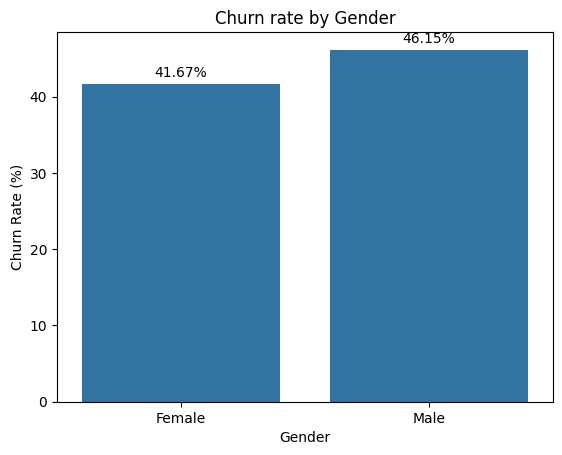

In [65]:
grouped_gen = df.groupby("gender")["churn_id"].mean().reset_index()
grouped_gen["churn_id"] = grouped_gen["churn_id"] * 100
ax = sns.barplot( x = "gender", y = "churn_id", data = grouped_gen)
ax.bar_label(ax.containers[0], padding = 3, fmt = "%.2f%%")
plt.title("Churn rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

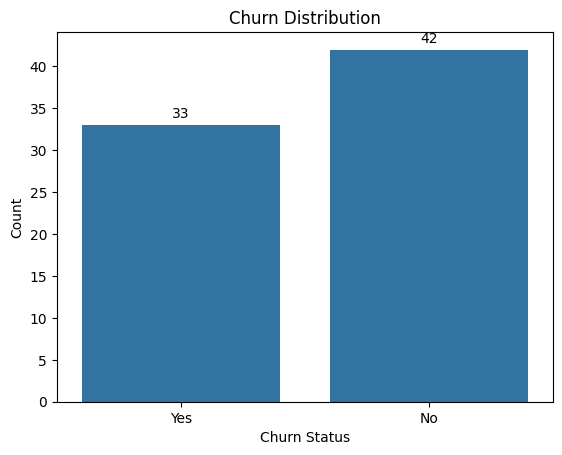

In [67]:
ax = sns.countplot(x="churn", data = df)
ax.bar_label(ax.containers[0], padding = 3)
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.title("Churn Distribution")
plt.show()

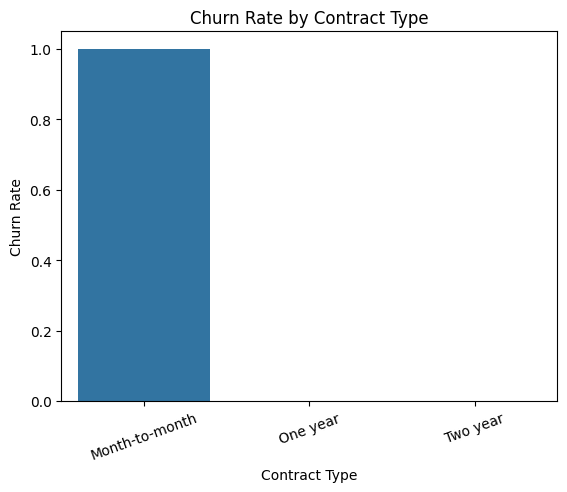

In [75]:

contract_churn = df.groupby("contract_type")["churn_id"].mean().reset_index()

sns.barplot(x="contract_type", y="churn_id", data=contract_churn)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.xticks(rotation=20)
plt.show()


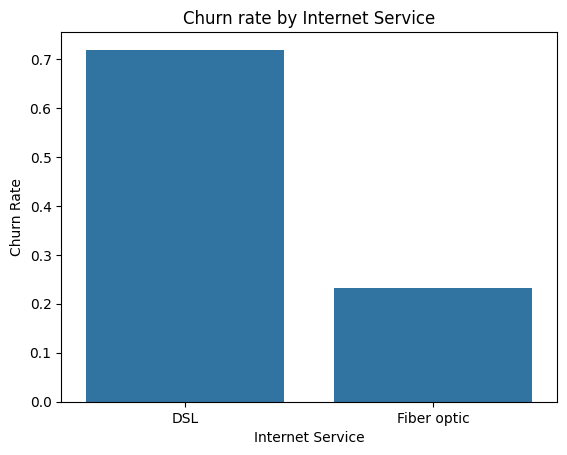

In [77]:
grouped_internet_srv = df.groupby("internet_service")["churn_id"].mean().reset_index()

sns.barplot(x="internet_service", y="churn_id", data = grouped_internet_srv)
plt.title("Churn rate by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Churn Rate")
plt.show()

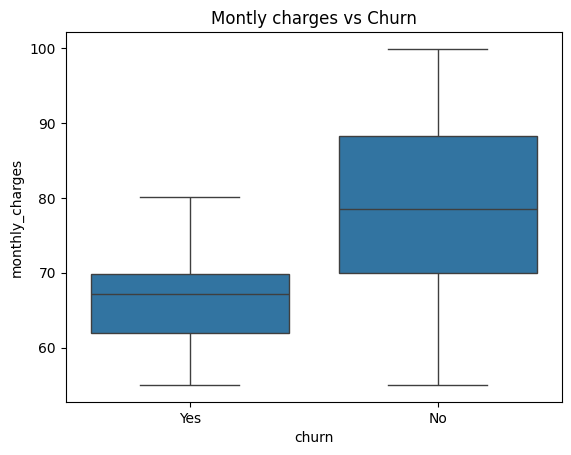

In [79]:
sns.boxplot(x="churn", y="monthly_charges", data = df)
plt.title("Montly charges vs Churn")
plt.show()

/var/folders/v4/5v881bk16fb9pvxvfd07z7x00000gn/T/ipykernel_48171/3900737013.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("tenure_group")["churn_id"].mean().reset_index()


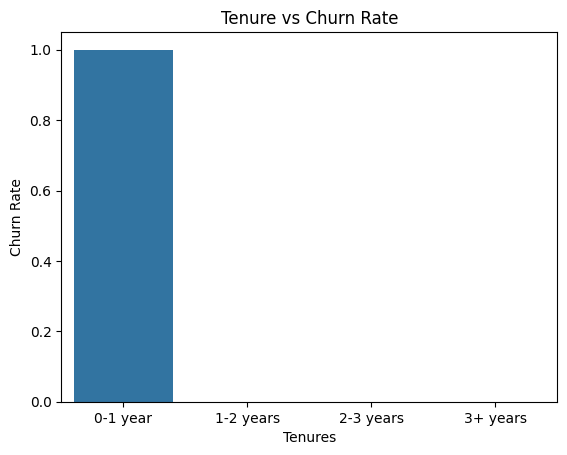

In [81]:
# Tenure vs Churn
df["tenure_group"] = pd.cut(
    df["tenure_months"],
    bins = [0,12,24,36,60],
    labels = ["0-1 year", "1-2 years", "2-3 years", "3+ years"]   
)

tenure_churn = df.groupby("tenure_group")["churn_id"].mean().reset_index()
sns.barplot(x="tenure_group", y="churn_id", data = tenure_churn)
plt.title("Tenure vs Churn Rate")
plt.xlabel("Tenures")
plt.ylabel("Churn Rate")
plt.show()

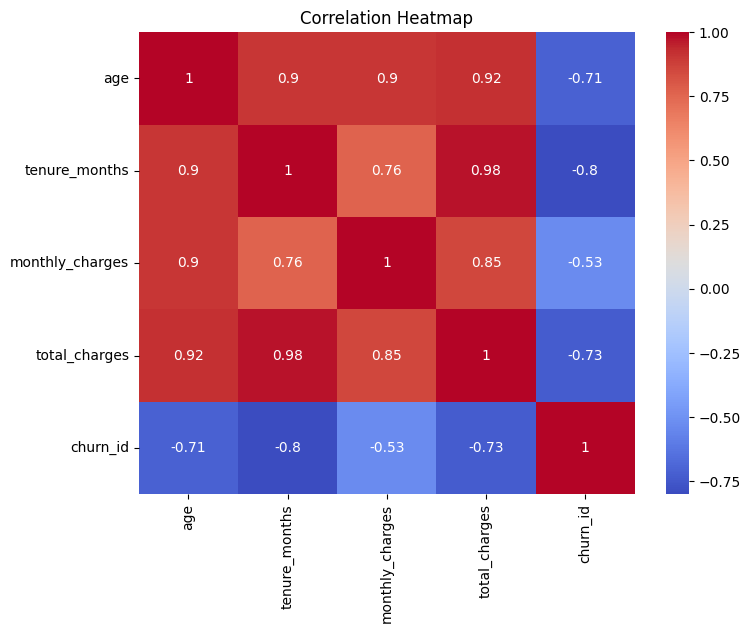

In [86]:
numeric_cols = ["age", "tenure_months", "monthly_charges", "total_charges"]
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + ["churn_id"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [87]:
df.to_csv("../data/loan_customers_cleaned.csv", index=False)